In [21]:
#Import packages
from scipy import optimize,arange
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
import random
import sympy as sm
from math import *
%matplotlib inline
from IPython.display import Markdown, display
import pandas as pd


a = sm.symbols('a') 
c_vec = sm.symbols('c_vec') 
b = sm.symbols('b') 
q_vec = sm.symbols('q_vec') 

In [18]:
N = 1000 # number of firms 
np.random.seed(1986)
#c_low = 1 
#c_high = 5
#c_vec = np.random.uniform(c_low,c_high,size=N)

In [30]:
#first we define the profit function for firm i:
#sumq = np.sum(q_vec)
#Pi_i = q_vec*((a-b*sumq)-c_vec)
Pi_i = q_vec*((a-b*np.sum(q_vec))-c_vec)


In [31]:
focs = sm.diff(Pi_i,q_vec)
focs

a - 2*b*q_vec - c_vec

In [9]:
def focs(a,b,q_vec,c_vec):
    # Using analytical FOCs from pdf-link -> kom frem til denne ved sympy!!
    return -b*q_vec+a-b*np.sum(q_vec)-c_vec 

In [10]:
def solve(a,b,c_vec):
    obj = lambda q_vec : focs(a,b,q_vec,c_vec)

    res = optimize.root(obj, x0 = [90 for n in range(N)])
     
    q_vec_star = res.x
    Q = np.sum(q_vec_star)
    
    # Use inverse demand to find price 
    p = a- b*Q
    return Q, p

In [14]:
Q,p = solve(a,b,c_vec)
print (Q,p)


978.8015079161239 3.119849208387606


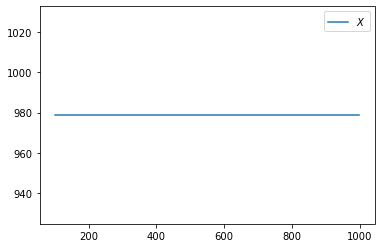

In [15]:
n_vec = list(range(100,1000))


output_vec1 = array([solve(a,b,c_vec)for n in n_vec])


fig,ax = plt.subplots()
ax.plot(n_vec,output_vec1[:,0], label = '$X$')
plt.legend()
plt.show()